In [ ]:
import pandas as pd
import numpy as np
import pandas
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor


import sys
import os

import sys
import os
sys.path.append(os.path.abspath("../../.."))

from utils.scatter_plot import scatter_prediction
from utils.eval_call import evaluate_model

from Preprocessing.imputation import get_imputation_maps, apply_imputation, ContextImputer

from Preprocessing.split_new import split_data
from utils.eval_call import evaluate_model

/Users/I746572/Desktop/bro/.venv/lib/python3.13/site-packages/sklearn/neighbors/_base.py:598: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


KNN Regression Performance Metrics:
MAE: 3942.02
MAPE: 18.39
RMSE: 30469.45
R²: 0.56
------------------------------


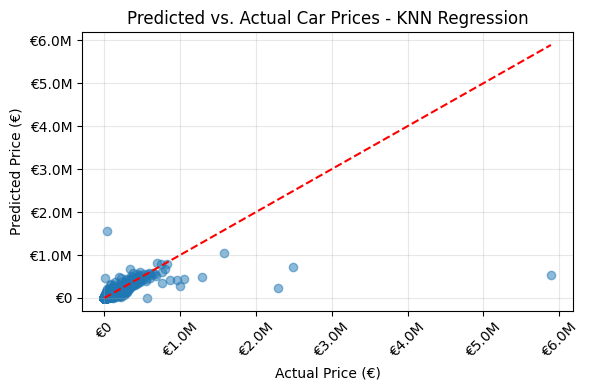

In [2]:
def main():


    X_train, X_test, y_train, y_test, categorical_features , numeric_features = split_data('../../../data.csv')

    # Preprocessing-Pipelines erstellen
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])


    knn_pipeline = Pipeline(steps=[
        ('imp_fc', ContextImputer('fuel_consumption_l_100km')),
        ('imp_ps', ContextImputer('power_ps')),
        ('imp_er', ContextImputer('electric_range')),
        ('preprocessor', preprocessor),
        ('model', KNeighborsRegressor(
        n_neighbors=6,
        weights='distance',  
        algorithm='ball_tree',
        p = 2, #Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.
        n_jobs=-1 
              ))
    ])

    # Modell trainieren
    knn_pipeline.fit(X_train, y_train)

    # Vorhersagen treffen
    y_pred_knn = knn_pipeline.predict(X_test)



    evaluate_model(y_test, y_pred_knn, "KNN Regression")
    scatter_prediction(y_test, y_pred_knn, "KNN Regression")



if __name__ == "__main__":
    main()